# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
ds = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [3]:
import random
N = 500
d = 10
ads_selected = []
nos_1 = [0] * d # No.of times ad got reward 1
nos_0 = [0] * d # No.of times ad got reward 0
total_reward = 0
for n in range(N):
  ad = 0 # index of ad selected at each round n
  max_random = 0
  for i in range(d):
    random_beta = random.betavariate(nos_1[i] + 1, nos_0[i] + 1)
    if(random_beta > max_random):
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = ds.values[n, ad]
  if(reward == 1):
    nos_1[ad] += 1
  else:
    nos_0[ad] += 1
  total_reward += reward

## Visualising the results - Histogram

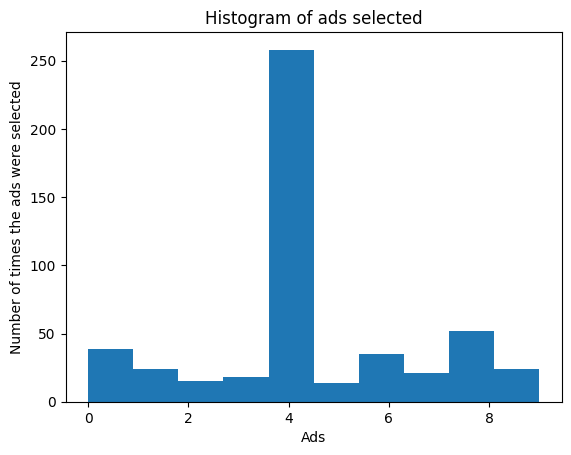

In [4]:
plt.hist(ads_selected)
plt.title('Histogram of ads selected')
plt.xlabel('Ads')
plt.ylabel('Number of times the ads were selected')
plt.show()